In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename="any_wav.wav"

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
!dir

 Volume in drive C is OS
 Volume Serial Number is F8D8-460B

 Directory of C:\Users\ch.sc.u4cse23160\wispnet\AudioClassification\UrbanSound8K

12/09/2025  09:28 AM    <DIR>          .
12/09/2025  09:18 AM    <DIR>          ..
12/09/2025  09:10 AM    <DIR>          .ipynb_checkpoints
12/09/2025  08:54 AM           352,844 any_wav.wav
12/09/2025  08:54 AM           175,832 Beranouli Compression Sensing.ipynb
12/09/2025  08:54 AM           182,485 Binary_random_Compression.ipynb
12/09/2025  08:54 AM           172,189 Chaotic_map.ipynb
12/09/2025  08:54 AM         3,611,259 Classifcation.ipynb
12/09/2025  08:54 AM         1,121,431 Compressing.ipynb
12/09/2025  08:54 AM    <DIR>          compression_results
12/09/2025  08:54 AM           193,631 Guassian_Compression_matrix.ipynb
12/09/2025  08:54 AM    <DIR>          output
12/09/2025  08:54 AM    <DIR>          saved_models
12/09/2025  08:54 AM    <DIR>          Test_audio
12/09/2025  09:28 AM         3,585,152 Untitled.ipynb
12/09/2025  

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'any_wav.wav',
 'Beranouli Compression Sensing.ipynb',
 'Binary_random_Compression.ipynb',
 'Chaotic_map.ipynb',
 'Classifcation.ipynb',
 'Compressing.ipynb',
 'compression_results',
 'Guassian_Compression_matrix.ipynb',
 'output',
 'saved_models',
 'Test_audio',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'UrbanSound8K',
 'UrbanSound8K.csv']

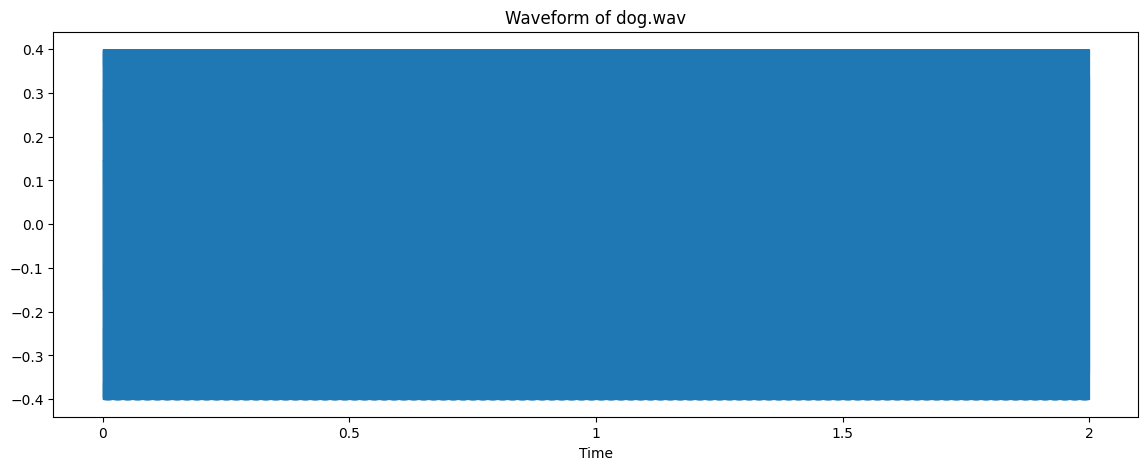

In [7]:
#Dog sound checking
data, sample_rate = librosa.load(filename)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title("Waveform of dog.wav")
plt.show()

ipd.Audio(filename)

In [8]:
sample_rate

22050

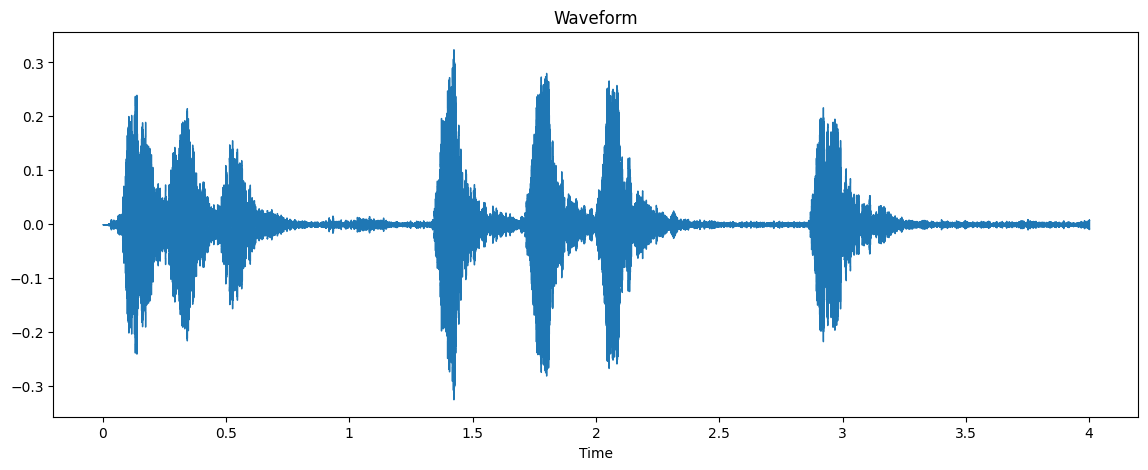

In [9]:
##sound to see waveform
filename = 'UrbanSound8K/audio/fold1/7383-3-0-0.wav'
data, sample_rate = librosa.load(filename)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)   # ← new function
plt.title("Waveform")
plt.show()

ipd.Audio(filename)

In [10]:
import IPython.display as ipd

ipd.Audio("UrbanSound8K/audio/fold1/7383-3-0-0.wav")

In [11]:
data

array([ 3.4924597e-10,  3.4924597e-10,  4.6566129e-10, ...,
       -7.9498515e-03, -7.7366987e-03, -8.0531817e-03],
      shape=(88200,), dtype=float32)

In [12]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
wave_sample_rate

44100

In [13]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [14]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [15]:
# preprocessing

In [16]:
### Let's read a sample audio using librosa
import librosa
audio_file_path= 'UrbanSound8K/audio/fold1/7383-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [17]:
print(librosa_audio_data)

[ 3.4924597e-10  3.4924597e-10  4.6566129e-10 ... -7.9498515e-03
 -7.7366987e-03 -8.0531817e-03]


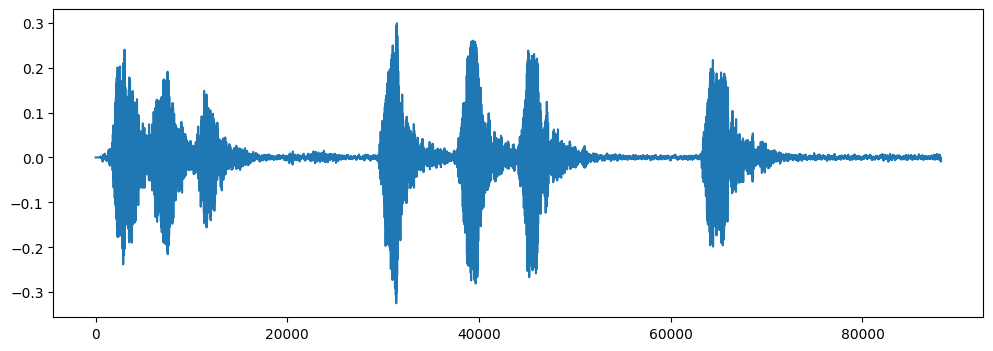

In [18]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [18]:
#Observation
#Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [19]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], shape=(176400, 2), dtype=int16)

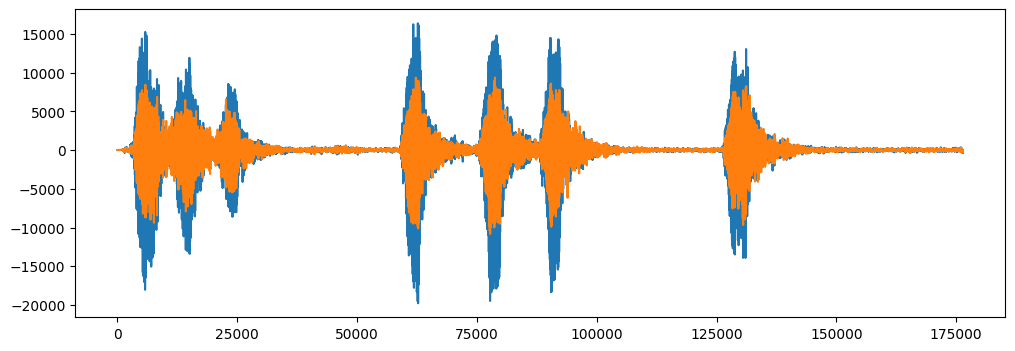

In [20]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [21]:
#Extract Features
#Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [21]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [22]:
mfccs

array([[-5.7041687e+02, -5.0580988e+02, -4.4661017e+02, ...,
        -4.8128598e+02, -4.7245932e+02, -4.6425366e+02],
       [ 3.2360130e+01,  9.3758621e+01,  1.4270895e+02, ...,
         1.0403226e+02,  1.1474982e+02,  1.1683809e+02],
       [ 2.6088989e+01,  3.4996727e+01,  4.0650406e+01, ...,
         1.1899885e+01,  1.7138733e+01,  1.3889361e+01],
       ...,
       [ 5.9291601e-01,  2.7261462e+00, -2.6107330e+00, ...,
        -2.7341044e+00, -3.7576482e+00, -5.8963099e+00],
       [-1.3069378e+00, -2.1206622e+00, -9.1924393e-01, ...,
        -1.2278581e+00, -3.3734818e+00, -4.1975551e+00],
       [-2.0638499e+00, -2.9027801e+00,  2.7278209e-01, ...,
        -1.3872116e+00, -3.3259063e+00, -8.4930611e-01]],
      shape=(40, 173), dtype=float32)

In [23]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

# Path to the audio dataset folder (STRING required)
audio_dataset_path = "UrbanSound8K/audio"

# CSV metadata file
csv_path = "UrbanSound8K.csv"

metadata = pd.read_csv(csv_path)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [26]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
def features_extractor(file):
    if not os.path.exists(file):     # ⛔ Skip if file removed
        return None

    try:
        audio, sample_rate = librosa.load(file, sr=None, mono=True, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features

    except Exception as e:
        return None

In [28]:
import numpy as np
from tqdm import tqdm

extracted_features = []

for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_label = row["class"]

    data = features_extractor(file_name)
    if data is not None:
        extracted_features.append([data, final_class_label])

 33%|█████████████████████████▍                                                    | 2847/8732 [00:45<01:31, 64.42it/s]C:\Users\ch.sc.u4cse23160\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [02:19<00:00, 62.46it/s]


In [29]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-275.91843, 119.49279, -98.21178, -66.51514, ...",dog_bark
1,"[-500.9084, 185.10641, -86.53282, 49.85885, 9....",children_playing
2,"[-531.1953, 186.93994, -70.34916, 40.429245, 9...",children_playing
3,"[-476.78442, 160.33328, -62.952843, 50.75117, ...",children_playing
4,"[-521.2447, 185.39264, -81.95047, 46.47355, 11...",children_playing


In [30]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(8732, 40)

In [31]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], shape=(8732,), dtype='<U16')

In [35]:
import sys
print(sys.executable)


C:\Users\ch.sc.u4cse23160\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe


In [36]:
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

# le = LabelEncoder()
# y = le.fit_transform(y)
# y = to_categorical(y)
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [33]:
y

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
 

In [37]:
import sys
print(sys.executable)

C:\Users\ch.sc.u4cse23160\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe


In [38]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [39]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(8732, 10))

In [40]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train

array([[-1.8378271e+02,  1.5365129e+02, -3.6178787e+01, ...,
         1.0025057e+00, -4.7213912e-01, -1.2038718e+00],
       [-8.4152161e+01,  1.6649818e+02, -6.1209232e+01, ...,
        -4.0521545e+00, -3.3977334e+00, -8.2560587e+00],
       [-6.7970741e+01,  2.6627291e+01, -4.8024189e+01, ...,
        -4.1831975e+00,  2.3861418e+00,  4.4640236e+00],
       ...,
       [-4.7486859e+02,  9.3468300e+01,  3.2284161e+01, ...,
        -1.1071193e+00, -1.5656761e+00, -9.8130518e-01],
       [-2.0102074e+02,  1.7294638e+02, -3.5023716e+01, ...,
         4.1071030e-01, -1.1205077e+00,  4.3810743e-01],
       [-4.8265601e+02,  2.3059308e+02,  2.8331995e+01, ...,
         7.3604608e-01, -1.9397887e+00, -4.5186172e+00]],
      shape=(6985, 40), dtype=float32)

In [42]:
X_train.shape

(6985, 40)

In [43]:
X_test.shape

(1747, 40)

In [44]:
y_train.shape

(6985, 10)

In [45]:
y_test.shape

(1747, 10)

In [46]:
y.shape

(8732, 10)

# Model Creation

In [47]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [49]:
### No of classes
num_labels=y.shape[1]

In [51]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [57]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1032 - loss: 24.4356
Epoch 1: val_loss improved from None to 2.29382, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1111 - loss: 11.5418 - val_accuracy: 0.1082 - val_loss: 2.2938
Epoch 2/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1208 - loss: 2.6552
Epoch 2: val_loss improved from 2.29382 to 2.28144, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1213 - loss: 2.5460 - val_accuracy: 0.1070 - val_loss: 2.2814
Epoch 3/100
192/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1186 - loss: 2.3746
Epoch 3: val_loss improved from 2.28144 to 2.27456, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1193 - loss: 2.3466 - val_accuracy: 0.1082 - val_loss: 2.2746
Epoch 4/100
192/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

In [58]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.754436194896698


In [62]:
filename = "UrbanSound8K/audio/fold2/4201-3-1-0.wav"

# extract features
prediction_feature = features_extractor(filename)

# reshape to (1, 40)
prediction_feature = prediction_feature.reshape(1, -1)

# predict
prediction = model.predict(prediction_feature)

# get class index
predicted_class = np.argmax(prediction, axis=1)

predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([3])

In [63]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [64]:
X_test[1]

array([-4.7063968e+02,  2.9131218e+01, -4.9619133e+01,  1.2126140e+01,
        2.1325384e+01, -1.0356941e+01, -2.4805668e+01,  2.6631000e+00,
       -6.1311426e+00, -2.5190462e+01, -1.0868788e+01,  5.4423690e+00,
       -1.4766212e+01, -2.8624239e+01, -9.4668636e+00,  3.6619711e-01,
       -1.0521499e+01, -1.2126454e+01, -6.3929715e+00, -5.4934416e+00,
       -1.3623618e+00,  9.1815462e+00,  1.3398618e+01,  1.9057032e+01,
        1.9586351e+01,  1.4740946e+01, -7.0200624e+00, -1.2732131e+01,
       -8.5070534e+00, -2.7875633e+00,  3.6298201e+00,  2.7014983e+00,
       -6.3688726e+00, -1.5669987e+01, -1.2475285e+01,  2.6824789e+00,
        1.1100426e+01, -1.5787050e+00, -2.0412352e+01, -1.6299290e+01],
      dtype=float32)

In [66]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [67]:
filename = "UrbanSound8K/audio/fold2/4201-3-1-0.wav"

# Load audio
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')

# Extract MFCC
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape for model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict using TensorFlow 2.12+
prediction = model.predict(mfccs_scaled_features)

# Get predicted class index
predicted_label = np.argmax(prediction, axis=1)

# Convert index to class name
prediction_class = labelencoder.inverse_transform(predicted_label)

print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: dog_bark


In [68]:
filename = "UrbanSound8K/audio/fold7/24631-6-0-0.wav"

# Load audio
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')

# Extract MFCC
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape for model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict using TensorFlow 2.12+
prediction = model.predict(mfccs_scaled_features)

# Get predicted class index
predicted_label = np.argmax(prediction, axis=1)

# Convert index to class name
prediction_class = labelencoder.inverse_transform(predicted_label)

print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: children_playing


In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [70]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Classification Report ===

                  precision    recall  f1-score   support

        dog_bark       0.63      0.92      0.75       195
children_playing       0.98      0.68      0.81        91
        car_horn       0.53      0.81      0.64       205
 air_conditioner       0.65      0.66      0.66       182
    street_music       0.96      0.75      0.84       202
        gun_shot       0.88      0.81      0.84       216
           siren       1.00      0.46      0.63        87
   engine_idling       0.86      0.88      0.87       187
      jackhammer       0.94      0.83      0.88       199
        drilling       0.68      0.51      0.59       183

        accuracy                           0.75      1747
       macro avg       0.81      0.73      0.75      1747
    weighted avg       0.79      0.75      0.76      1747

=== Summary Metrics ===
Accuracy           : 0.7544
Precision (micro)  : 0.7544
Precision (macro)  : 0.8123
Precisi

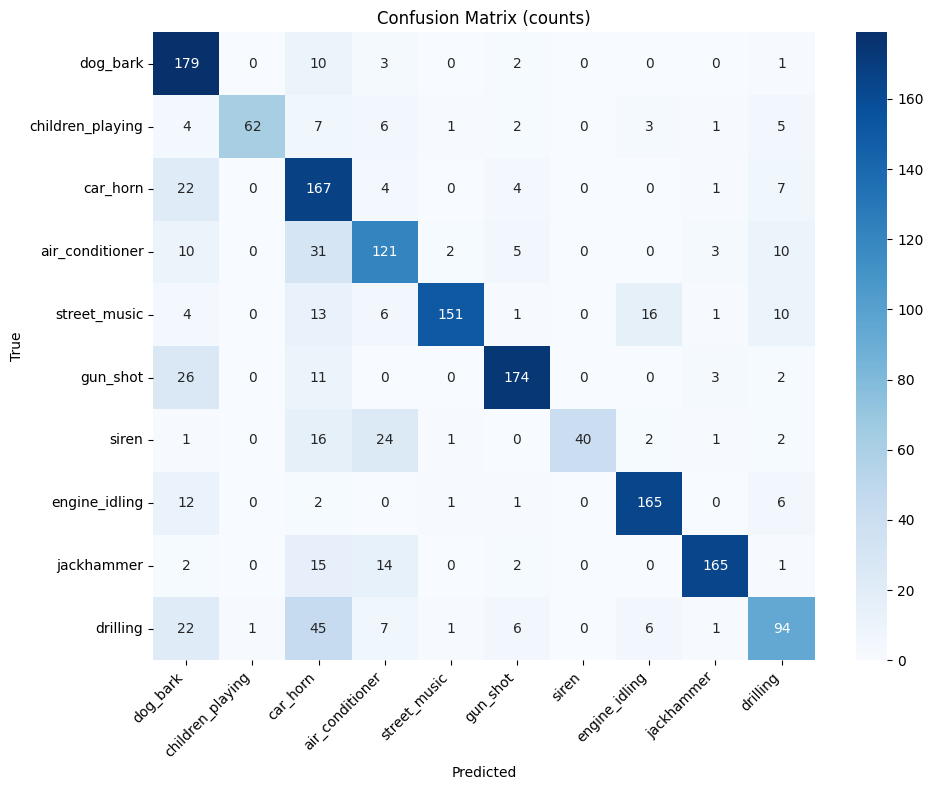

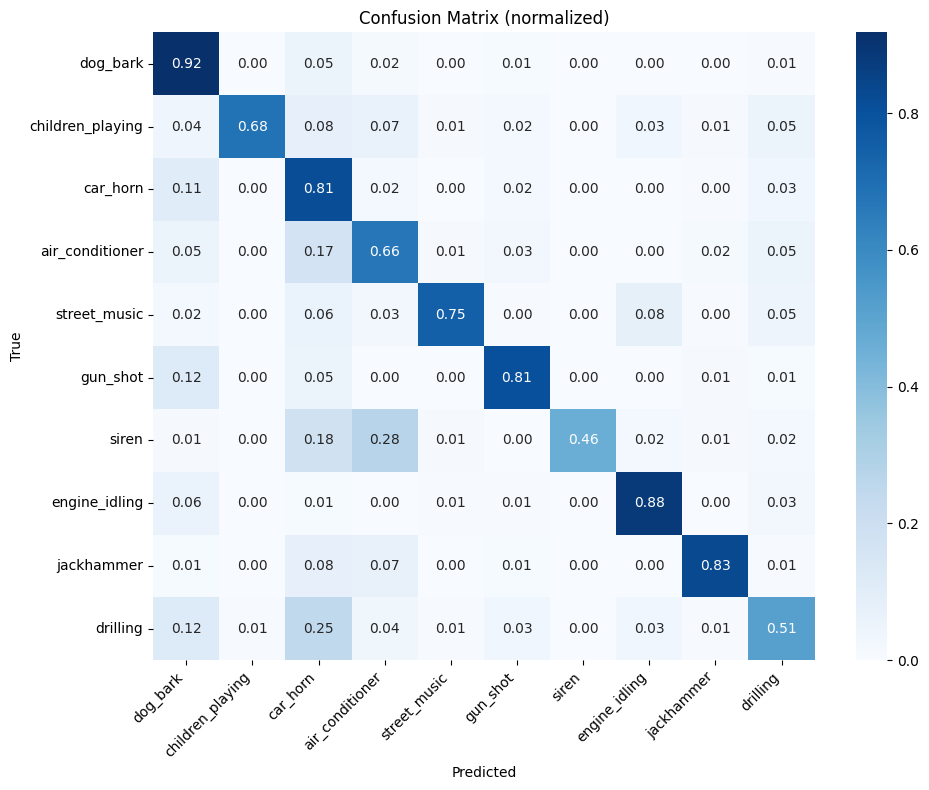

In [73]:
# Imports (run once)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score, f1_score)

# --- Evaluation snippet ---
def eval_and_report(model, X_test, y_test, class_names=None, history=None, cm_figsize=(10,8)):
    # 1) prepare true labels
    if isinstance(y_test, np.ndarray) and y_test.ndim == 2:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = np.asarray(y_test).astype(int)

    # 2) predictions (probabilities -> class indices)
    y_pred_proba = model.predict(X_test)
    if y_pred_proba.ndim == 2:
        y_pred = np.argmax(y_pred_proba, axis=1)
    else:
        y_pred = np.asarray(y_pred_proba).astype(int)

    # 3) class names handling
    # If you have a metadata['class'] ordering that matches label indices, pass it.
    if class_names is None:
        # try to infer from metadata if available in global scope
        try:
            class_names = list(metadata['class'].unique())
        except Exception:
            # fallback to generic names
            n_classes = max(y_true.max(), y_pred.max()) + 1
            class_names = [f"class_{i}" for i in range(n_classes)]
    # ensure list length covers all label indices
    n_classes = max(y_true.max(), y_pred.max()) + 1
    if len(class_names) < n_classes:
        class_names = list(class_names) + [f"class_{i}" for i in range(len(class_names), n_classes)]
    target_names = [class_names[i] for i in range(n_classes)]

    # 4) print classification report
    print("=== Classification Report ===\n")
    print(classification_report(y_true, y_pred, labels=list(range(n_classes)), target_names=target_names, zero_division=0))

    # 5) overall metrics
    acc = accuracy_score(y_true, y_pred)
    prec_micro = precision_score(y_true, y_pred, average='micro', zero_division=0)
    prec_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    prec_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print("=== Summary Metrics ===")
    print(f"Accuracy           : {acc:.4f}")
    print(f"Precision (micro)  : {prec_micro:.4f}")
    print(f"Precision (macro)  : {prec_macro:.4f}")
    print(f"Precision (weighted):{prec_weighted:.4f}")
    print(f"Recall (macro)     : {rec_macro:.4f}")
    print(f"F1 (macro)         : {f1_macro:.4f}")
    print(f"F1 (weighted)      : {f1_weighted:.4f}\n")

    # 6) confusion matrices
    cm = confusion_matrix(y_true, y_pred, labels=list(range(n_classes)))
    cm_norm = cm.astype("float") / (cm.sum(axis=1)[:, np.newaxis] + 1e-12)

    plt.figure(figsize=cm_figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix (counts)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=cm_figsize)
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix (normalized)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 7) optional: training history plots (accuracy & loss)
    if history is not None and hasattr(history, 'history'):
        h = history.history
        # Accuracy
        acc_key = 'accuracy' if 'accuracy' in h else ('acc' if 'acc' in h else None)
        if acc_key:
            plt.figure(figsize=(7,4))
            plt.plot(h[acc_key], label='train_'+acc_key)
            if 'val_' + acc_key in h:
                plt.plot(h['val_' + acc_key], label='val_'+acc_key)
            plt.title("Accuracy")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.show()
        # Loss
        if 'loss' in h:
            plt.figure(figsize=(7,4))
            plt.plot(h['loss'], label='train_loss')
            if 'val_loss' in h:
                plt.plot(h['val_loss'], label='val_loss')
            plt.title("Loss")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.legend()
            plt.show()

    # return useful values if you want to use them programmatically
    return {'y_true': y_true, 'y_pred': y_pred, 'cm': cm, 'cm_norm': cm_norm}

# === Run evaluation ===
results = eval_and_report(model, X_test, y_test, class_names=None, history=globals().get('history', None))